In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
data = pd.read_csv('Downloads\Country-data.csv')

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.shape

(167, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## Cleaning the data

#### Missing value check

In [6]:
round(100*(data.isnull().sum())/len(data), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

## EDA on given data

In [7]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Top 10 and bottom 10 countries by  child mortality rate

In [260]:
df_mort = pd.concat([data.nlargest(10,['child_mort'])['country'].reset_index()['country']
                ,data.nsmallest(10,['child_mort'])['country'].reset_index()['country']],axis=1)
df_mort.columns = ['mort - Top10','mort - Bottom10']
df_mort

,mort - Top10,mort - Bottom10
0,Haiti,Iceland
1,Sierra Leone,Luxembourg
2,Chad,Singapore
3,Central African Republic,Finland
4,Mali,Sweden
5,Nigeria,Japan
6,Niger,Norway
7,Angola,Slovenia
8,Burkina Faso,Czech Republic
9,"Congo, Dem. Rep.",Cyprus


#### Top 10 and bottom 10 countries by exports

In [261]:
exports = pd.concat([data.nlargest(10,['exports'])['country'].reset_index()['country']
                ,data.nsmallest(10,['exports'])['country'].reset_index()['country']],axis=1)
exports.columns = ['exports - Top10','exports - Bottom10']
exports

,exports - Top10,exports - Bottom10
0,Singapore,Myanmar
1,Luxembourg,Timor-Leste
2,Malta,Eritrea
3,Ireland,Burundi
4,Seychelles,Nepal
5,Malaysia,Afghanistan
6,Equatorial Guinea,Brazil
7,"Congo, Rep.",Central African Republic
8,Hungary,Rwanda
9,United Arab Emirates,Tonga


#### Top 10 and bottom 10 countries by health

In [262]:
health = pd.concat([data.nlargest(10,['health'])['country'].reset_index()['country']
                ,data.nsmallest(10,['health'])['country'].reset_index()['country']],axis=1)
health.columns = ['health - Top10','health - Bottom10']
health

,health - Top10,health - Bottom10
0,United States,Qatar
1,"Micronesia, Fed. Sts.",Myanmar
2,Sierra Leone,Pakistan
3,France,"Congo, Rep."
4,Netherlands,Turkmenistan
5,Liberia,Indonesia
6,Moldova,Kuwait
7,Burundi,Eritrea
8,Germany,Oman
9,Switzerland,Brunei


#### Top 10 and bottom 10 countries by imports

In [263]:
imports = pd.concat([data.nlargest(10,['imports'])['country'].reset_index()['country']
                ,data.nsmallest(10,['imports'])['country'].reset_index()['country']],axis=1)
imports.columns = ['imports - Top10','imports - Bottom10']
imports

,imports - Top10,imports - Bottom10
0,Singapore,Myanmar
1,Malta,Brazil
2,Luxembourg,Japan
3,Seychelles,United States
4,Lesotho,Argentina
5,Liberia,Sudan
6,Ireland,Nigeria
7,Kyrgyz Republic,Venezuela
8,Solomon Islands,Colombia
9,"Micronesia, Fed. Sts.",Gabon


#### Top 10 and bottom 10 countries by income

In [264]:
income = pd.concat([data.nlargest(10,['income'])['country'].reset_index()['country']
                ,data.nsmallest(10,['income'])['country'].reset_index()['country']],axis=1)
income.columns = ['income - Top10','income - Bottom10']
income

,income - Top10,income - Bottom10
0,Qatar,"Congo, Dem. Rep."
1,Luxembourg,Liberia
2,Brunei,Burundi
3,Kuwait,Niger
4,Singapore,Central African Republic
5,Norway,Mozambique
6,United Arab Emirates,Malawi
7,Switzerland,Guinea
8,United States,Togo
9,Ireland,Sierra Leone


#### Top 10 and bottom 10 countries by inflation

In [265]:
inflation = pd.concat([data.nlargest(10,['inflation'])['country'].reset_index()['country']
                ,data.nsmallest(10,['inflation'])['country'].reset_index()['country']],axis=1)
inflation.columns = ['inflation - Top10','inflation - Bottom10']
inflation

,inflation - Top10,inflation - Bottom10
0,Nigeria,Seychelles
1,Venezuela,Ireland
2,Mongolia,Japan
3,Timor-Leste,Czech Republic
4,Equatorial Guinea,Slovenia
5,Yemen,Latvia
6,Sri Lanka,Bahamas
7,Angola,Singapore
8,Argentina,Spain
9,"Congo, Dem. Rep.",Lebanon


#### Top 10 and bottom 10 countries by life_expec

In [266]:
life_expec = pd.concat([data.nlargest(10,['life_expec'])['country'].reset_index()['country']
                ,data.nsmallest(10,['life_expec'])['country'].reset_index()['country']],axis=1)
life_expec.columns = ['life_expec - Top10','life_expec - Bottom10']
life_expec

,life_expec - Top10,life_expec - Bottom10
0,Japan,Haiti
1,Singapore,Lesotho
2,Switzerland,Central African Republic
3,Australia,Zambia
4,Iceland,Malawi
5,Spain,South Africa
6,Italy,Mozambique
7,Sweden,Sierra Leone
8,France,Guinea-Bissau
9,Israel,Afghanistan


#### Top 10 and bottom 10 countries by total_fer

In [267]:
total_fer = pd.concat([data.nlargest(10,['total_fer'])['country'].reset_index()['country']
                ,data.nsmallest(10,['total_fer'])['country'].reset_index()['country']],axis=1)
total_fer.columns = ['total_fer - Top10','total_fer - Bottom10']
total_fer

,total_fer - Top10,total_fer - Bottom10
0,Niger,Singapore
1,Chad,South Korea
2,Mali,Hungary
3,"Congo, Dem. Rep.",Moldova
4,Burundi,Bosnia and Herzegovina
5,Timor-Leste,Latvia
6,Angola,Malta
7,Uganda,Spain
8,Burkina Faso,Germany
9,Nigeria,Japan


#### Top 10 and bottom 10 countries by gdpp

In [268]:
gdpp = pd.concat([data.nlargest(10,['gdpp'])['country'].reset_index()['country']
                ,data.nsmallest(10,['gdpp'])['country'].reset_index()['country']],axis=1)
gdpp.columns = ['gdpp - Top10','gdpp - Bottom10']
gdpp

,gdpp - Top10,gdpp - Bottom10
0,Luxembourg,Burundi
1,Norway,Liberia
2,Switzerland,"Congo, Dem. Rep."
3,Qatar,Niger
4,Denmark,Sierra Leone
5,Sweden,Madagascar
6,Australia,Mozambique
7,Netherlands,Central African Republic
8,Ireland,Malawi
9,United States,Eritrea


#### Now we have the list of best performing countries and the least. Lets Analyze which countries are doing good and bad based on all the given indices

#### Best performing countries

In [276]:
pd.concat([df_mort['mort - Bottom10'],
exports['exports - Top10'],
health['health - Top10'],
imports['imports - Top10'],
income['income - Top10'],
inflation['inflation - Bottom10'],
life_expec['life_expec - Top10'],
total_fer['total_fer - Bottom10'],
gdpp['gdpp - Top10']],axis=1)

,mort - Bottom10,exports - Top10,health - Top10,imports - Top10,income - Top10,inflation - Bottom10,life_expec - Top10,total_fer - Bottom10,gdpp - Top10
0,Iceland,Singapore,United States,Singapore,Qatar,Seychelles,Japan,Singapore,Luxembourg
1,Luxembourg,Luxembourg,"Micronesia, Fed. Sts.",Malta,Luxembourg,Ireland,Singapore,South Korea,Norway
2,Singapore,Malta,Sierra Leone,Luxembourg,Brunei,Japan,Switzerland,Hungary,Switzerland
3,Finland,Ireland,France,Seychelles,Kuwait,Czech Republic,Australia,Moldova,Qatar
4,Sweden,Seychelles,Netherlands,Lesotho,Singapore,Slovenia,Iceland,Bosnia and Herzegovina,Denmark
5,Japan,Malaysia,Liberia,Liberia,Norway,Latvia,Spain,Latvia,Sweden
6,Norway,Equatorial Guinea,Moldova,Ireland,United Arab Emirates,Bahamas,Italy,Malta,Australia
7,Slovenia,"Congo, Rep.",Burundi,Kyrgyz Republic,Switzerland,Singapore,Sweden,Spain,Netherlands
8,Czech Republic,Hungary,Germany,Solomon Islands,United States,Spain,France,Germany,Ireland
9,Cyprus,United Arab Emirates,Switzerland,"Micronesia, Fed. Sts.",Ireland,Lebanon,Israel,Japan,United States


#### Countries appear the most in the best perfoming. It seems singapore, Luxembourg and Ireland are in a way performing good among all

In [277]:
pd.concat([df_mort['mort - Bottom10'],
exports['exports - Top10'],
health['health - Top10'],
imports['imports - Top10'],
income['income - Top10'],
inflation['inflation - Bottom10'],
life_expec['life_expec - Top10'],
total_fer['total_fer - Bottom10'],
gdpp['gdpp - Top10']]).value_counts()

Singapore                 7
Luxembourg                5
Ireland                   5
Japan                     4
Switzerland               4
Spain                     3
United States             3
Sweden                    3
Norway                    3
Malta                     3
Seychelles                3
Germany                   2
Moldova                   2
France                    2
Czech Republic            2
United Arab Emirates      2
Hungary                   2
Micronesia, Fed. Sts.     2
Slovenia                  2
Liberia                   2
Iceland                   2
Australia                 2
Netherlands               2
Qatar                     2
Latvia                    2
Denmark                   1
Burundi                   1
Italy                     1
Israel                    1
Solomon Islands           1
Bahamas                   1
Bosnia and Herzegovina    1
Kuwait                    1
Lebanon                   1
Kyrgyz Republic           1
Brunei              

#### Least performing countries

In [ ]:
pd.concat([df_mort['mort - Top10'],
exports['exports - Bottom10'],
health['health - Bottom10'],
imports['imports - Bottom10'],
income['income - Bottom10'],
inflation['inflation - Top10'],
life_expec['life_expec - Bottom10'],
total_fer['total_fer - Top10'],
gdpp['gdpp - Bottom10']],axis=1)

#### Countries appear the most in the least perfoming. It seems African republic, congo and niger are in a way performing lower among all

In [278]:
pd.concat([df_mort['mort - Top10'],
exports['exports - Bottom10'],
health['health - Bottom10'],
imports['imports - Bottom10'],
income['income - Bottom10'],
inflation['inflation - Top10'],
life_expec['life_expec - Bottom10'],
total_fer['total_fer - Top10'],
gdpp['gdpp - Bottom10']]).value_counts()

Central African Republic    5
Congo, Dem. Rep.            5
Niger                       4
Sierra Leone                4
Nigeria                     4
Burundi                     4
Eritrea                     3
Mozambique                  3
Angola                      3
Timor-Leste                 3
Malawi                      3
Myanmar                     3
Mali                        2
Liberia                     2
Brazil                      2
Burkina Faso                2
Venezuela                   2
Argentina                   2
Chad                        2
Afghanistan                 2
Haiti                       2
Qatar                       1
Japan                       1
South Africa                1
Madagascar                  1
Lesotho                     1
United States               1
Brunei                      1
Turkmenistan                1
Tonga                       1
Pakistan                    1
Guinea                      1
Mongolia                    1
Sudan     

#### As we see we have median score for all the indices, Lets see how many countries are above and below the medians

In [279]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


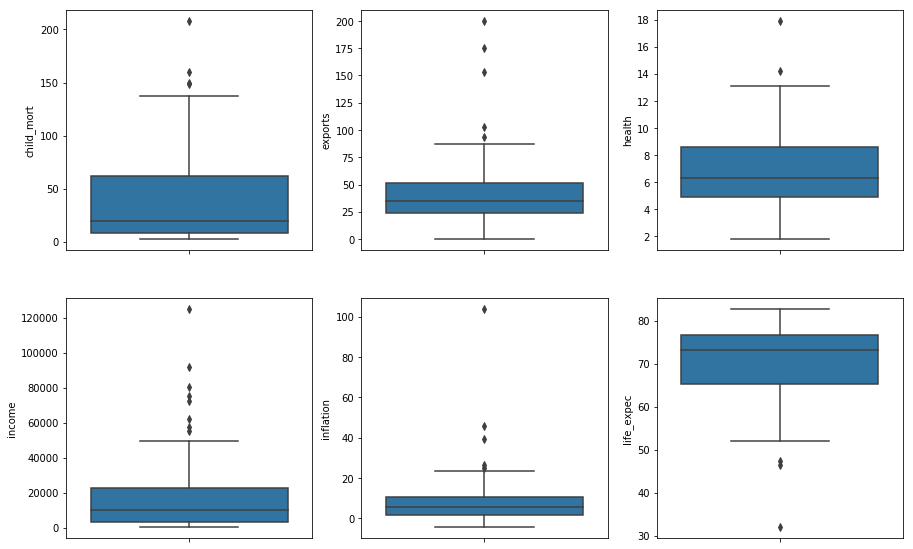

In [321]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot('child_mort',data =data,orient = 'v')
plt.subplot(3,3,2)
sns.boxplot('exports',data =data,orient = 'v')
plt.subplot(3,3,3)
sns.boxplot('health',data =data,orient = 'v')
plt.subplot(3,3,4)
sns.boxplot('income',data =data,orient = 'v')
plt.subplot(3,3,5)
sns.boxplot('inflation',data =data,orient = 'v')
plt.subplot(3,3,6)
sns.boxplot('life_expec',data =data,orient = 'v')

#### median child mortality is 19 deaths per 1000.It seems there are 84(50%) countries above the median of 19 deaths. Which is a concern for WHO

In [282]:
len(data[data.child_mort >= 19.3])/len(data)

0.5029940119760479

#### Average/median life expectancy of all countries is around 73 years. It seems there are 14%(24) countries have life expectancy less than 60 years

In [291]:
len(data[data.life_expec <= 60])/len(data)

0.1437125748502994

## Lets see in the world map the most exportes and the least exporters in the world

In [297]:
data1 = data.copy()

In [298]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

In [299]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="http")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        if country == 'IL':
            return(31.0461,34.8516)
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

In [300]:
data1['country_code'] = data1.country.apply(lambda x: get_continent(x)[0] )
data1['continent_code'] = data1.country.apply(lambda x: get_continent(x)[1] )
data1['location'] = data1.country_code.apply(lambda x: geolocate(x))
data1['latitude'] , data1['longitude'] = zip(*data1.location)

#### Top 10 exporters

In [301]:
df = data1.nlargest(10,['exports'])
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(df)):
        lat = df.iloc[i]['latitude']
        long = df.iloc[i]['longitude']
        radius=5
        popup_text = """Country : {} <br>
                    Child mortality rate: {}<br>"""
        popup_text = popup_text.format(df.iloc[i]['country'],
                                   df.iloc[i]['child_mort']
                                   )
        
        folium.Marker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(world_map)
#show the map

world_map

#### Least 10 exporters

In [303]:
df = data1.nsmallest(10,['exports'])
import folium
from folium.plugins import MarkerCluster
#empty map
world_map1= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(df)):
        lat = df.iloc[i]['latitude']
        long = df.iloc[i]['longitude']
        radius=5
        popup_text = """Country : {} <br>
                    Child mortality rate: {}<br>"""
        popup_text = popup_text.format(df.iloc[i]['country'],
                                   df.iloc[i]['child_mort']
                                   )
        
        folium.Marker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(world_map1)
#show the map

world_map1

#### Let us see the pairwise plot for relation among variables

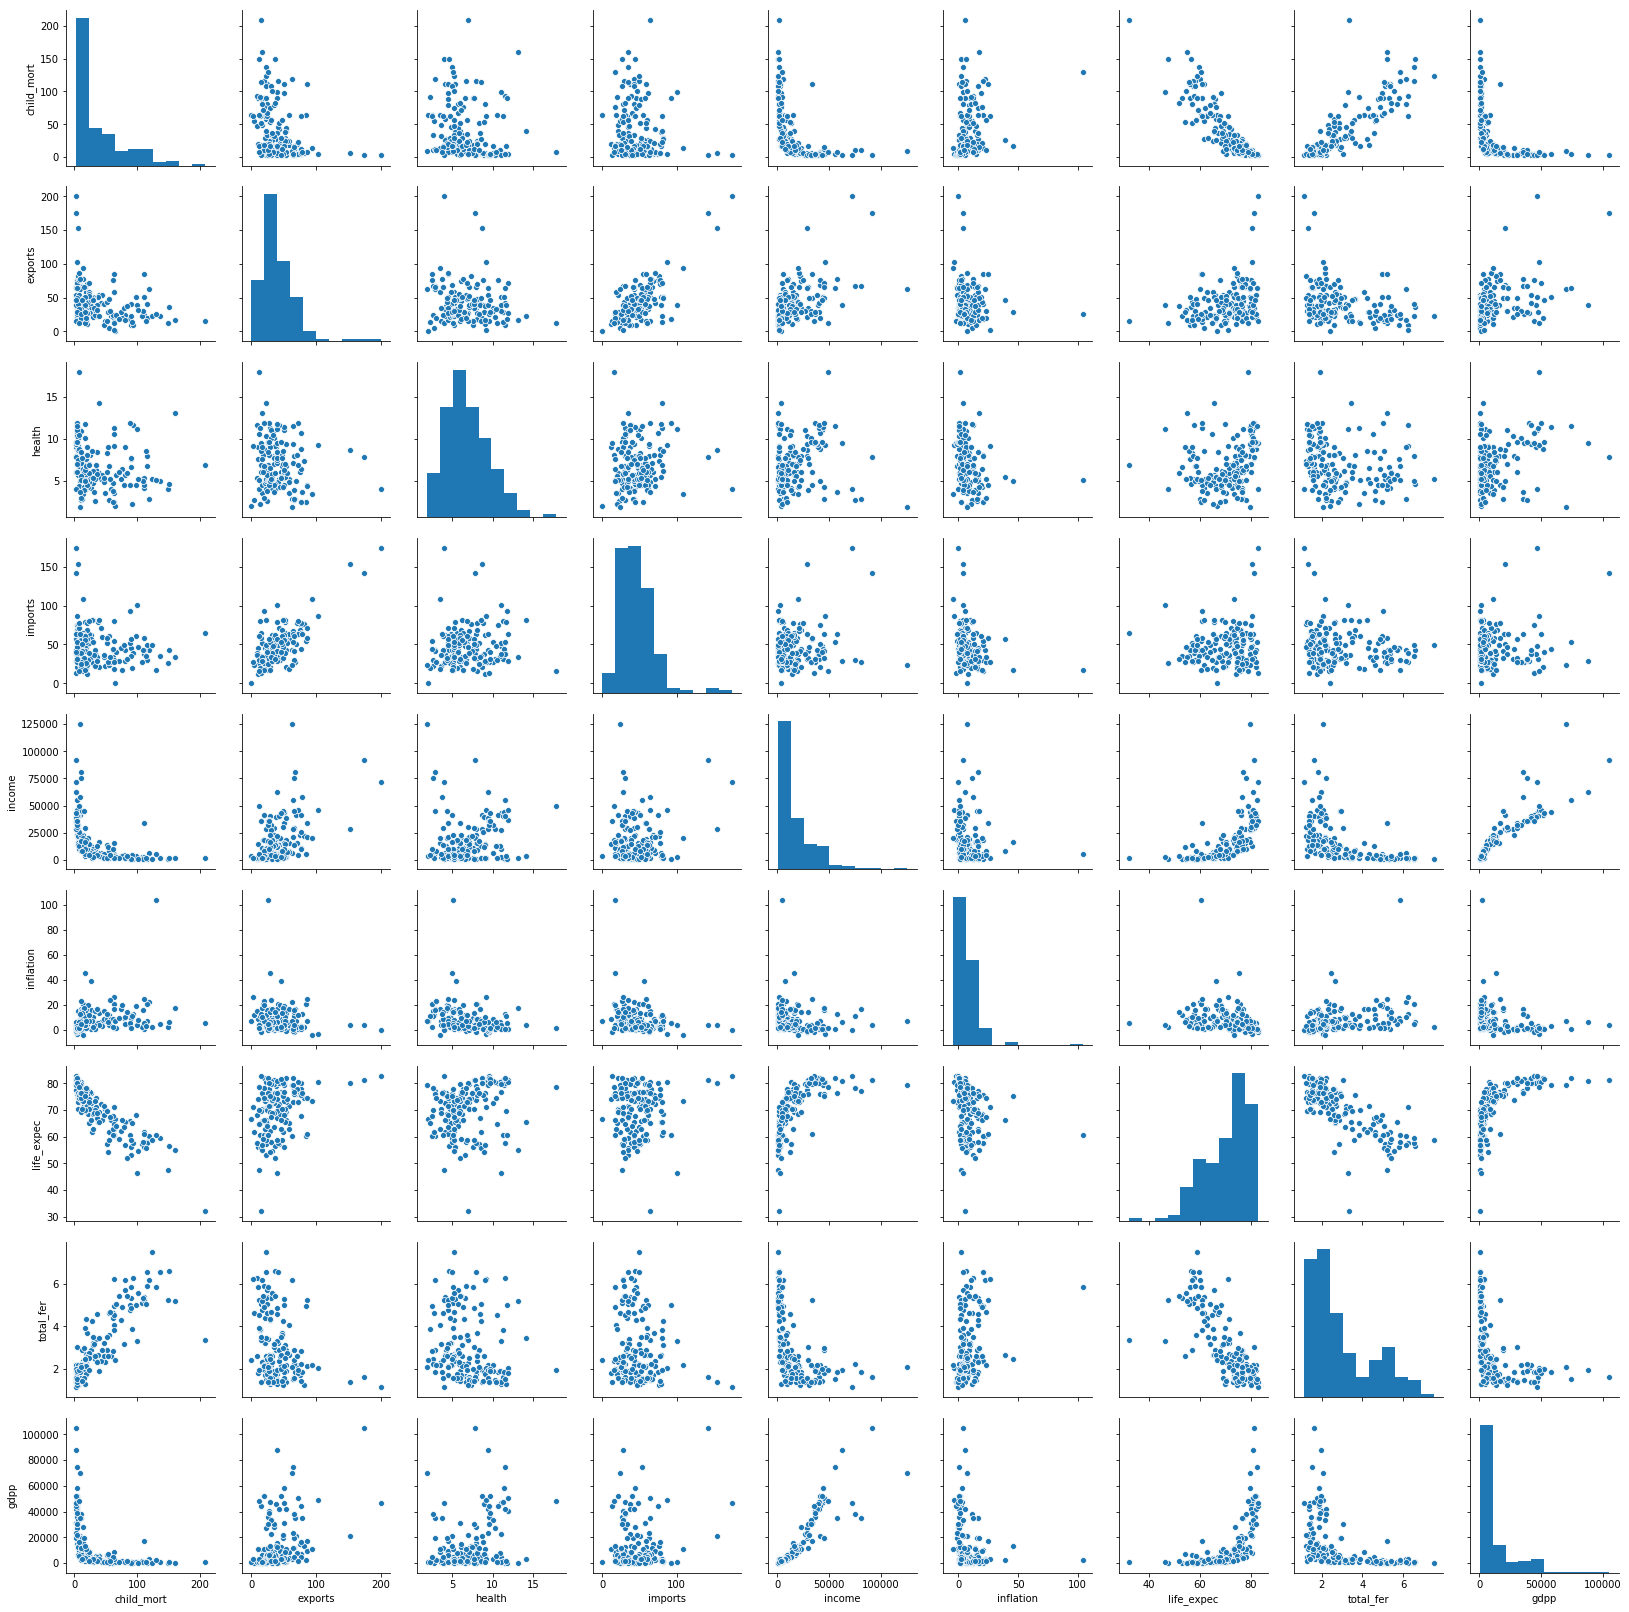

In [310]:
sns.pairplot(data)

#### Let us see the correlation of this indices with each other. 

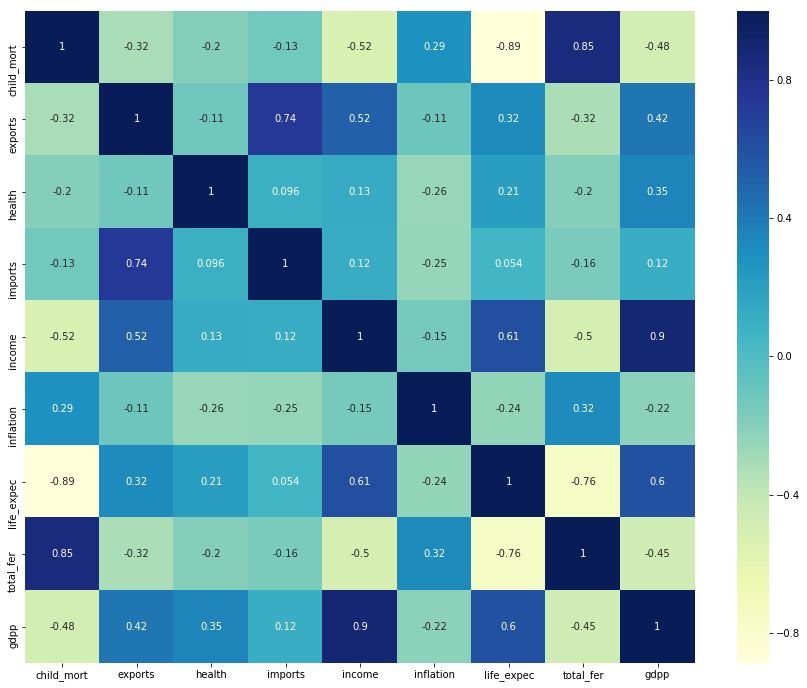

In [309]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

#### There are some key insigths seen from the correlation plot.
1. Income and Gdpp are highly correlated.Which is as expected
2. Imports and exports are highly related. Higher are the imports, exports also higher
3. Increase in child mortality significantly decreses the gdpp, Signifying less income leads to hig mortality rate.
4. Income has a great role to play in life expectancy of people.

## Let's see how many outliers we have for each category

In [322]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [339]:
q1 = data.child_mort.quantile(0.05)
q3 = data.child_mort.quantile(0.95)
mort_ol = round(100*len(data[(data.child_mort < q1) | (data.child_mort > q3)])/len(data),2)

q1 = data.exports.quantile(0.05)
q3 = data.exports.quantile(0.95)
exports_ol = round(100*len(data[(data.exports < q1) | (data.exports > q3)])/len(data),2)

q1 = data.health.quantile(0.05)
q3 = data.health.quantile(0.95)
health_ol = round(100*len(data[(data.health < q1) | (data.health > q3)])/len(data),2)

q1 = data.imports.quantile(0.05)
q3 = data.imports.quantile(0.95)
imports_ol = round(100*len(data[(data.imports < q1) | (data.imports > q3)])/len(data),2)

q1 = data.inflation.quantile(0.05)
q3 = data.inflation.quantile(0.95)
inflation_ol = round(100*len(data[(data.inflation < q1) | (data.inflation > q3)])/len(data),2)

q1 = data.life_expec.quantile(0.05)
q3 = data.life_expec.quantile(0.95)
life_expec_ol = round(100*len(data[(data.life_expec < q1) | (data.life_expec > q3)])/len(data),2)

q1 = data.income.quantile(0.05)
q3 = data.income.quantile(0.95)
income_ol = round(100*len(data[(data.income < q1) | (data.income > q3)])/len(data),2)

#### Below are the outlier oercentage of each category, As the percent is high and volume of data is low, We can not missout countries and their information, So outlier treetment is not done.

In [340]:
mort_ol,exports_ol,health_ol,imports_ol,inflation_ol,life_expec_ol,income_ol

(10.18, 10.78, 10.78, 10.78, 10.78, 10.18, 10.78)

#### Lets use hopkins statistics and check the suitability of data for clustering.

In [341]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [344]:
data_train = data.iloc[:,[1,2,3,4,5,6,7,8,9]]
data_train.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### 90% Hopkins Statistic score suggests that data is highly likely for clustering

In [345]:
hopkins(data_train)

0.9057762075418022

## Modelling

#### Finding the Optimal Number of Clusters using ssd(squared distance method) and Silhouette Analysis

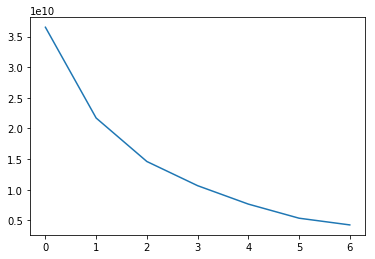

In [347]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_train)
    
    ssd.append(kmeans.inertia_)

plt.plot(ssd)

In [349]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_train)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_train, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.7256314906273207
For n_clusters=3, the silhouette score is 0.7003508054481694
For n_clusters=4, the silhouette score is 0.6109297437247547
For n_clusters=5, the silhouette score is 0.5734773443272871
For n_clusters=6, the silhouette score is 0.589653373502461
For n_clusters=7, the silhouette score is 0.5933963642696555
For n_clusters=8, the silhouette score is 0.595182457210018


#### From the results it is seen that 2 or 3 clusters will give appropriate results for the given data, As the silhoutte score is close enough for 2 and 3, lets proceed with 3 clusterd for better clustering with diversification

In [360]:
#model with k=3
# trying with 100 iterations for better convergence
kmeans = KMeans(n_clusters=3, max_iter=100)
kmeans.fit(data_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [361]:
# assign the label
data['cluster_id'] = kmeans.labels_
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


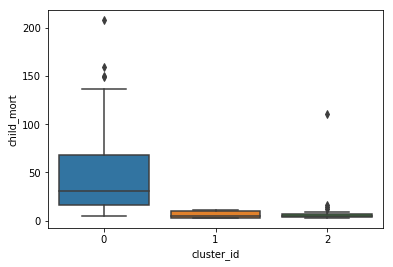

In [362]:
# plot
sns.boxplot(x='cluster_id', y='child_mort', data=data)

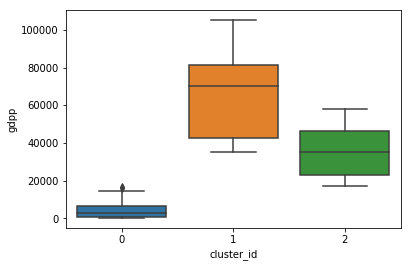

In [363]:
# plot
sns.boxplot(x='cluster_id', y='gdpp', data=data)

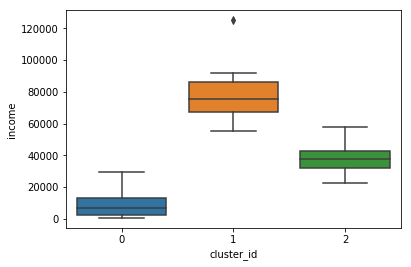

In [364]:
# plot
sns.boxplot(x='cluster_id', y='income', data=data)

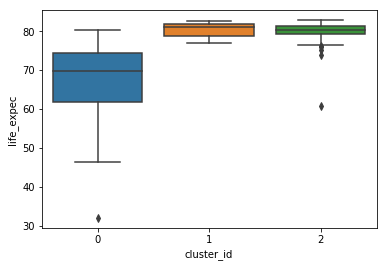

In [365]:
# plot
sns.boxplot(x='cluster_id', y='life_expec', data=data)

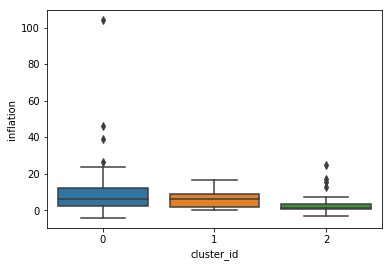

In [366]:
# plot
sns.boxplot(x='cluster_id', y='inflation', data=data)

#### From the above plots it seems that cluster 0 countries has needs some attention as it has lower income,lower gdpp and higher mortality rate,In contrast cluster 1 is the better performing countries

#### Countries in cluster 0

In [380]:
data[data['cluster_id'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cid_single_link
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,0


#### Countries in cluster 1

In [381]:
data[data['cluster_id'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cid_single_link
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1,9
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,1,24
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,1,26
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,1,28
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,1,31
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,1,33
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,1,36


#### Lets create the clusters using hierarchial clustering for more information

In [369]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [368]:
data_train.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Trying with single linkage method

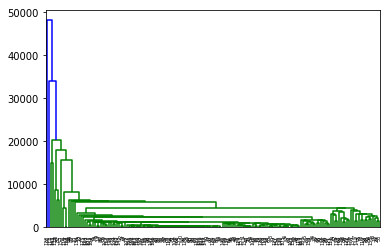

In [371]:
mergings = linkage(data_train, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

In [382]:
# 3 clusters does not yield expected results lets break the dendo gram down further to see if there are any meaningful result
cluster_labels = cut_tree(mergings, n_clusters=40).reshape(-1, )
cluster_labels

array([ 0,  0,  0,  0,  1,  1,  0,  2,  3,  0,  4,  5,  0,  6,  0,  7,  0,
        0,  0,  0,  0,  0,  8,  9,  0,  0,  0,  0,  0, 10,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  1, 11, 12, 13,  0,  0,  0,  0, 14,  0,
       15,  0, 10, 16,  0,  0,  0, 17,  0, 18,  0,  0,  0,  0,  0,  0, 15,
       17,  0,  0,  0,  0, 19, 20, 21,  0, 22,  0, 23,  0,  0, 24,  0,  0,
        1,  0,  0,  0, 25, 15, 26,  0,  0,  0, 23,  0,  0, 12,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 19, 27,  0,  0, 28, 29,  0,  0,  0,
        0,  0, 15, 30, 31,  0, 32,  0,  0, 29,  0,  0, 15,  0, 33, 34, 30,
        0,  0, 35, 11,  0,  0,  0,  0,  2, 36,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0, 37, 38, 39,  1,  0,  0,  1,  0,  0,  0])

In [379]:
# assign the label
data['cid_single_link'] = cluster_labels
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cid_single_link
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1


#### The above results does not yield the expected output,we can not seggregate optimum clusters using this single linkage method, as this method comuputes the cluster with each point and with its most close neighbouthood points, hence lets explore the complete linkage method

#### Lets try with complete linkage method

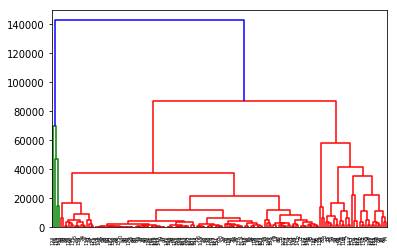

In [384]:
mergings = linkage(data_train, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [385]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [386]:
data['cid_complete_linkage'] = cluster_labels
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cid_single_link,cid_complete_linkage
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1,0


#### Lets analyze the clusters formed by complete linkage method, Which seems to be relevant here

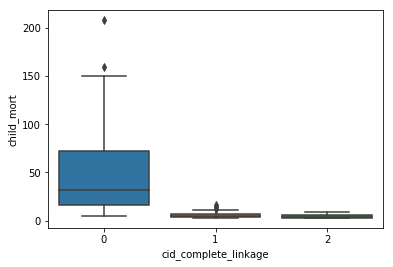

In [387]:
# plot
sns.boxplot(x='cid_complete_linkage', y='child_mort', data=data)

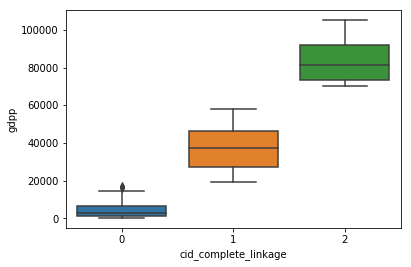

In [388]:
# plot
sns.boxplot(x='cid_complete_linkage', y='gdpp', data=data)

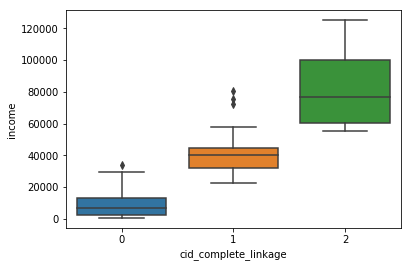

In [389]:
# plot
sns.boxplot(x='cid_complete_linkage', y='income', data=data)

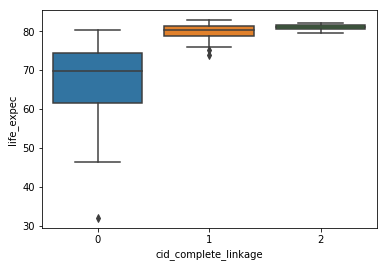

In [390]:
# plot
sns.boxplot(x='cid_complete_linkage', y='life_expec', data=data)

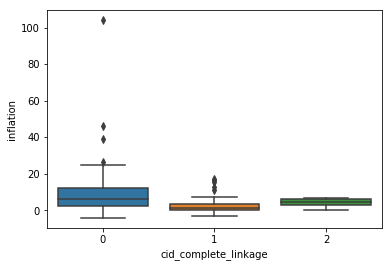

In [391]:
# plot
sns.boxplot(x='cid_complete_linkage', y='inflation', data=data)

#### A very clear clusters formed by hierarchial clustering here, The cluster 0 seems to be most support needed countries and cluster 2 gives us the good performing countries

#### Lets combine the results of k-means and hierarchial clustering(complete linkage) method and see which countries fall into common cluster of most under developed

In [396]:
data_underdeveloped_countries = data[(data['cluster_id'] == 0) & (data['cid_complete_linkage'] == 0)]

In [397]:
data_underdeveloped_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cid_single_link,cid_complete_linkage
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1,0


In [ ]:
#### Lets pick the under developed countries by again clustering these data to find most under developed countries

In [399]:
data_und_c = data_underdeveloped_countries.iloc[:,[1,2,3,4,5,6,7,8,9]]
data_und_c.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [400]:
hopkins(data_und_c)

0.8805424410319203

In [401]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_und_c)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_und_c, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.6364801237907738
For n_clusters=3, the silhouette score is 0.5766202599847857
For n_clusters=4, the silhouette score is 0.563535663130265
For n_clusters=5, the silhouette score is 0.531018524116446
For n_clusters=6, the silhouette score is 0.5223674595167809
For n_clusters=7, the silhouette score is 0.4629652051386063
For n_clusters=8, the silhouette score is 0.46064373419275606


In [413]:
#model with k=4
# trying with 100 iterations for better convergence
kmeans = KMeans(n_clusters=4, max_iter=100)
kmeans.fit(data_und_c)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [414]:
# assign the label
data_underdeveloped_countries['cluster_id'] = kmeans.labels_
data_underdeveloped_countries.head()

C:\Users\Anil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cid_single_link,cid_complete_linkage
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,1,0


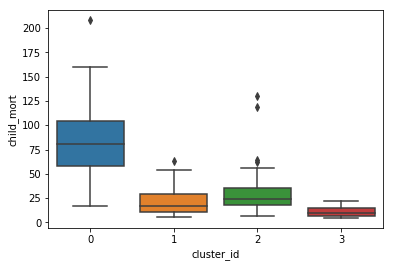

In [405]:
# plot
sns.boxplot(x='cluster_id', y='child_mort', data=data_und_c)

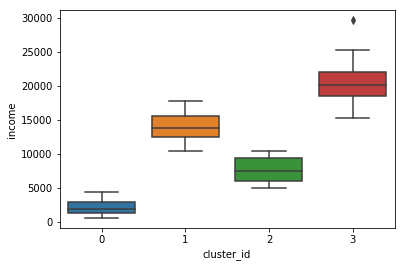

In [406]:
# plot
sns.boxplot(x='cluster_id', y='income', data=data_und_c)

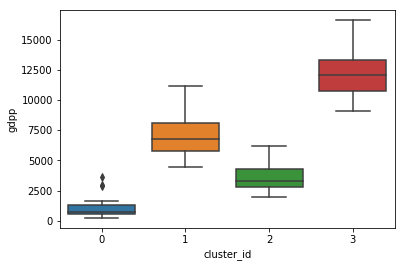

In [407]:
# plot
sns.boxplot(x='cluster_id', y='gdpp', data=data_und_c)

#### From the above we see cluster 0 is in most under developed condition,Lets pick tthe cluster 0 to see the countries and its statistics

In [415]:
data_most_udc = data_underdeveloped_countries[(data_underdeveloped_countries['cluster_id'] == 0)]

In [416]:
data_most_udc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cid_single_link,cid_complete_linkage
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0,0,0
16,Belize,18.8,58.2,5.20,57.5,7880,1.14,71.4,2.71,4340,0,0,0
18,Bhutan,42.7,42.5,5.20,70.7,6420,5.99,72.1,2.38,2180,0,0,0


In [417]:
df1 = data_most_udc.iloc[:,[1,2,3,4,5,6,7,8,9]]
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
6,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220
16,18.8,58.2,5.20,57.5,7880,1.14,71.4,2.71,4340
18,42.7,42.5,5.20,70.7,6420,5.99,72.1,2.38,2180


In [428]:
hopkins(df1)

0.7673595149638271

#### Multiple iteration on hopkins gave result more than 70%, which is a good score for clustering the data again

In [429]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df1)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.5523765417824672
For n_clusters=3, the silhouette score is 0.45170425728344327
For n_clusters=4, the silhouette score is 0.42993545404348454
For n_clusters=5, the silhouette score is 0.43585000426888276
For n_clusters=6, the silhouette score is 0.4333807045018505
For n_clusters=7, the silhouette score is 0.41408767387045003
For n_clusters=8, the silhouette score is 0.4252089616820066


In [432]:
#model with k=5 as silhoutte score is on higher side
# trying with 100 iterations for better convergence
kmeans = KMeans(n_clusters=5, max_iter=100)
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [433]:
data_most_udc['cluster_id'] = kmeans.labels_
data_most_udc.head()

C:\Users\Anil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cid_single_link,cid_complete_linkage
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,4,0,0
16,Belize,18.8,58.2,5.20,57.5,7880,1.14,71.4,2.71,4340,2,0,0
18,Bhutan,42.7,42.5,5.20,70.7,6420,5.99,72.1,2.38,2180,1,0,0


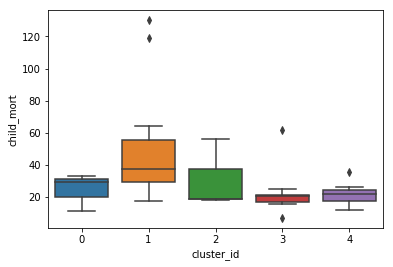

In [434]:
# plot
sns.boxplot(x='cluster_id', y='child_mort', data=data_most_udc)

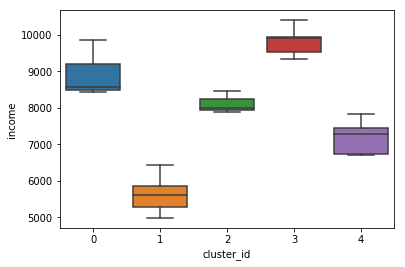

In [435]:
sns.boxplot(x='cluster_id', y='income', data=data_most_udc)

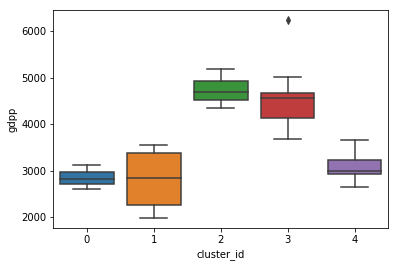

In [436]:
sns.boxplot(x='cluster_id', y='gdpp', data=data_most_udc)

#### From the above we see cluster 1 falls into most under developed countries cluster. Lets pick these countries and check the statistics

In [439]:
data_submit = data_most_udc[(data_most_udc['cluster_id'] == 1)]

In [441]:
data_submit.shape

(11, 13)

In [442]:
data_submit

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cid_single_link,cid_complete_linkage
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1,0,0
18,Bhutan,42.7,42.5,5.20,70.7,6420,5.990,72.1,2.38,2180,1,0,0
19,Bolivia,46.6,41.2,4.84,34.3,5410,8.780,71.6,3.20,1980,1,0,0
30,Cape Verde,26.5,32.7,4.09,61.8,5830,0.505,72.5,2.67,3310,1,0,0
38,"Congo, Rep.",63.9,85.1,2.46,54.7,5190,20.700,60.4,4.95,2740,1,0,0
65,Guyana,37.6,51.4,5.38,79.1,5840,5.730,65.5,2.65,3040,1,0,0
105,Morocco,33.5,32.2,5.20,43.0,6440,0.976,73.5,2.58,2830,1,0,0
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.000,60.5,5.84,2330,1,0,0
120,Philippines,31.9,34.8,3.61,36.6,5600,4.220,69.0,3.16,2130,1,0,0
127,Samoa,18.9,29.2,6.47,53.1,5400,1.720,71.5,4.34,3450,1,0,0


In [443]:
data_submit.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cid_single_link,cid_complete_linkage
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.0,11.0
mean,51.636364,40.827273,4.567273,50.354545,5650.909091,16.245545,67.872727,3.803636,2824.545455,1.0,0.0,0.0
std,38.373748,19.741028,1.191437,17.717695,487.964231,30.040761,5.287928,1.350224,596.663450,0.0,0.0,0.0
min,17.400000,12.400000,2.460000,17.400000,4980.000000,0.505000,60.100000,2.380000,1980.000000,1.0,0.0,0.0
25%,29.200000,30.700000,3.850000,39.750000,5295.000000,2.700000,63.000000,2.660000,2255.000000,1.0,0.0,0.0
50%,37.600000,34.800000,5.070000,53.100000,5600.000000,5.730000,69.900000,3.200000,2830.000000,1.0,0.0,0.0
75%,55.250000,46.950000,5.200000,61.050000,5870.000000,14.740000,71.850000,4.645000,3380.000000,1.0,0.0,0.0
max,130.000000,85.100000,6.470000,79.100000,6440.000000,104.000000,73.500000,6.160000,3550.000000,1.0,0.0,0.0


#### Lets compare this data_submit to our original data to check how the statistics differ

In [444]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cid_single_link,cid_complete_linkage
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689,0.425150,5.988024,0.251497
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809,0.794614,10.627305,0.487415
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000,0.000000,0.000000,0.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000,0.000000,0.000000,0.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,0.000000,0.000000,0.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000,0.000000,9.500000,0.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,2.000000,39.000000,2.000000


#### The below 11 countries from data_submit are in dier need of support to eradicate the poverty, Let us design a plan to help them

In [446]:
data_submit['country']

3           Angola
18          Bhutan
19         Bolivia
30      Cape Verde
38     Congo, Rep.
65          Guyana
105        Morocco
113        Nigeria
120    Philippines
127          Samoa
151          Tonga
Name: country, dtype: object

#### The above 11 countries also appeared in our EDA analysis of being the least performers.

In [447]:
help_countries = data[data.country.isin(data_submit['country'])]

In [448]:
help_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cid_single_link,cid_complete_linkage
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0,0,0
18,Bhutan,42.7,42.5,5.20,70.7,6420,5.990,72.1,2.38,2180,0,0,0
19,Bolivia,46.6,41.2,4.84,34.3,5410,8.780,71.6,3.20,1980,0,0,0
30,Cape Verde,26.5,32.7,4.09,61.8,5830,0.505,72.5,2.67,3310,0,0,0
38,"Congo, Rep.",63.9,85.1,2.46,54.7,5190,20.700,60.4,4.95,2740,0,0,0
65,Guyana,37.6,51.4,5.38,79.1,5840,5.730,65.5,2.65,3040,0,0,0
105,Morocco,33.5,32.2,5.20,43.0,6440,0.976,73.5,2.58,2830,0,0,0
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.000,60.5,5.84,2330,0,0,0
120,Philippines,31.9,34.8,3.61,36.6,5600,4.220,69.0,3.16,2130,0,0,0
127,Samoa,18.9,29.2,6.47,53.1,5400,1.720,71.5,4.34,3450,0,0,0
